Black friday is an informal name for the Friday following Thanksgiving Day in the United States, which is celebrated on the fourth Thursday of November. Many stores offer highly promoted sales on Black Friday and open very early (sometimes as early as midnight), or may even start their slaes at some time on Thanksgiving

## Importing necessary libraries

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [71]:
df = pd.read_csv('train.csv')

In [72]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


## Exploring the data

In [73]:
df.shape

(550068, 12)

The dataframe has 550068 rows and 12 columns

In [74]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


There are a few null values in the
'Product_Category_2' and 'Product_Category_3' columns

In [76]:
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,173638


So there are 173638 missing values and 383247 missing values in the 'Product_Category_2' and 'Product_Category_3' columns


## Data Visualization

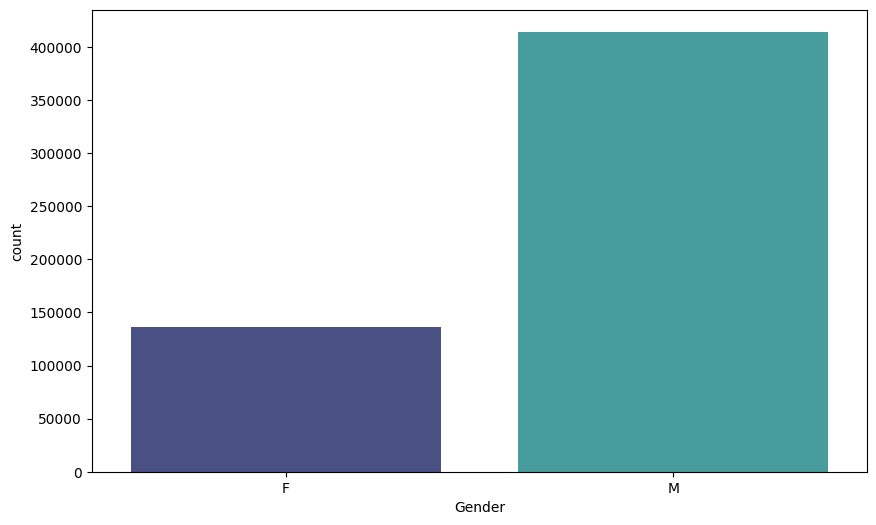

In [77]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Gender', palette='mako')
plt.show()

The countplot() shows the occurrences of the gender in the dataset \
The count of Male gender is higher as compared to the female

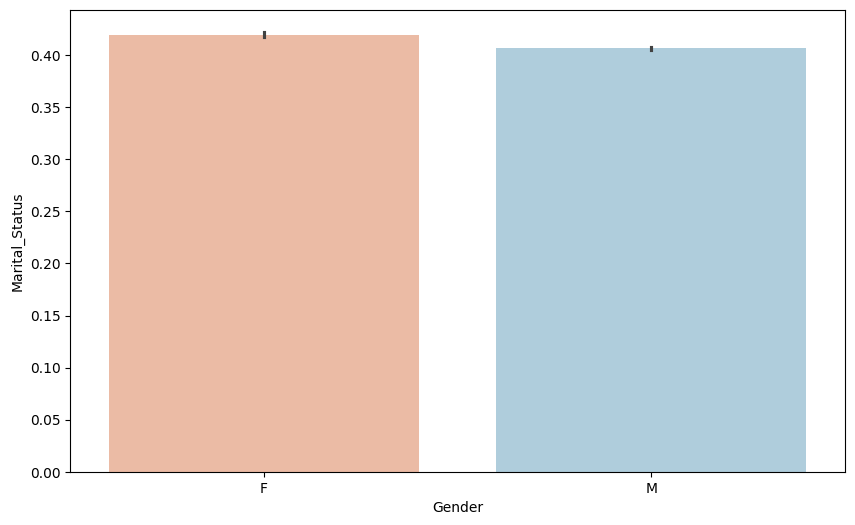

In [78]:
plt.figure(figsize=(10,6))
sns.barplot(x='Gender', y='Marital_Status',data=df, palette='RdBu')
plt.show()

This plot shows that females have a slightly higher rate compared to males when it comes to marital status

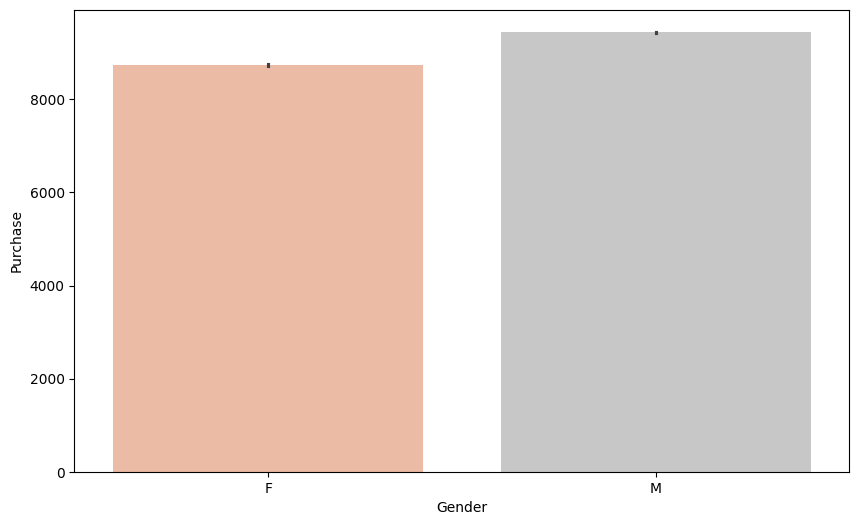

In [79]:
plt.figure(figsize=(10,6))
sns.barplot(x='Gender', y='Purchase', data=df, palette='RdGy')
plt.show()

Higher purchases have been made by males compared to females

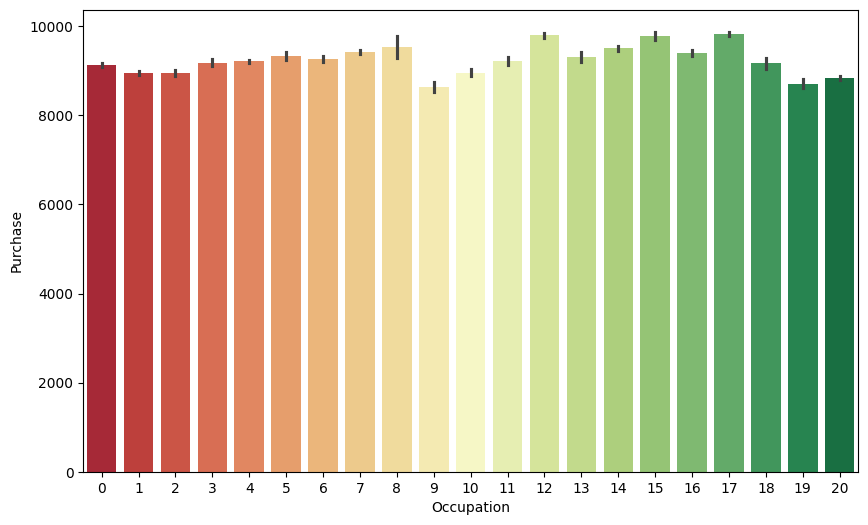

In [80]:
plt.figure(figsize=(10,6))
sns.barplot(x='Occupation', y='Purchase', data=df, palette='RdYlGn')
plt.show()

This plot shows the types of occupations individuals have and the corresponding purchase amounts associated with each occupation \
So, we can see that occupations 12, 15, and 17 have higher purchase amounts compared to other occupations.

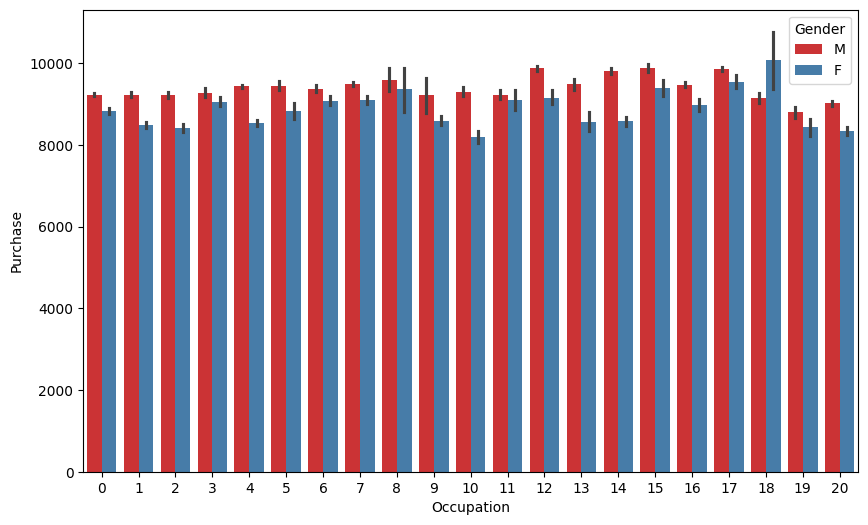

In [81]:
plt.figure(figsize=(10,6))
sns.barplot(x='Occupation',y='Purchase',hue='Gender', data=df, palette='Set1')
plt.show()

"In this graph, it can be seen that females in occupation 18 have higher purchases compared to others

## Outlier Detection


 Checking the presence of outliers using BoxPlot

<Axes: xlabel='Gender', ylabel='Purchase'>

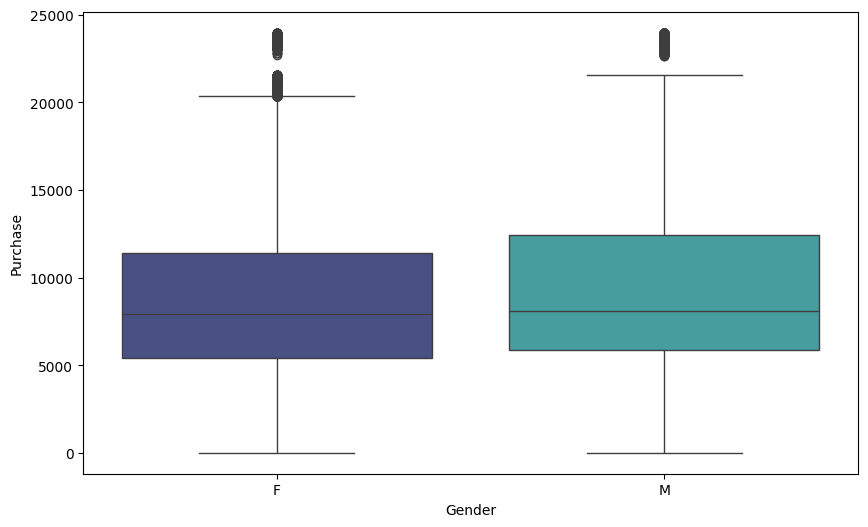

In [82]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Gender', y='Purchase', palette='mako')

The outlier has a purchase amount significantly higher than the other female/male data points. It is represented by the dot above the upper whisker of the female/male box plot (above 20000)

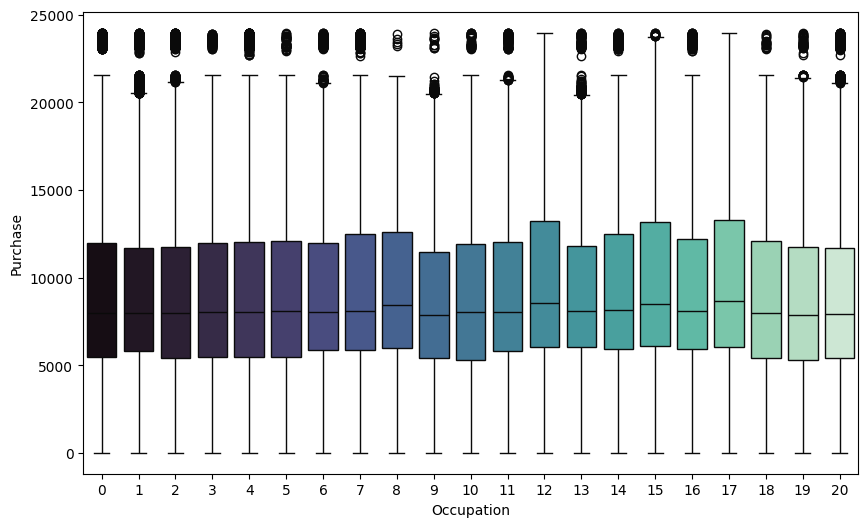

In [83]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Occupation', y='Purchase', palette='mako')
plt.show()

Again, there are outliers above 20000. As you can see, any value above 20000 is considered an outlier

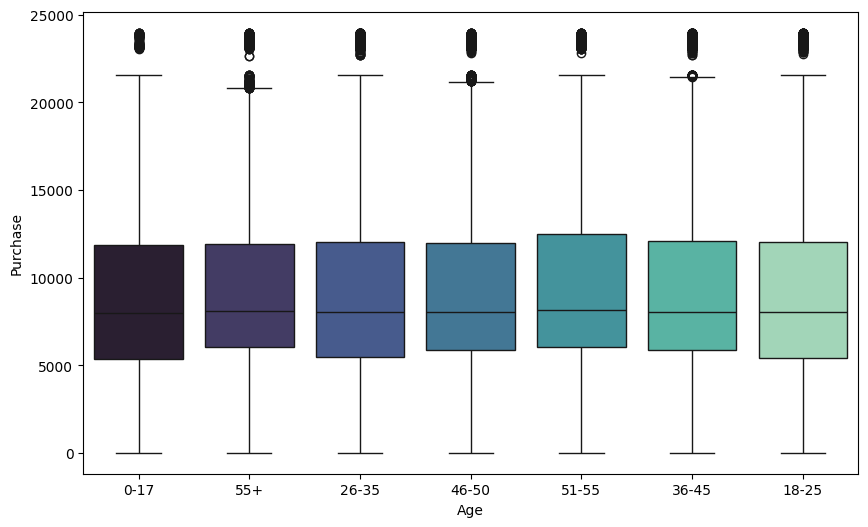

In [84]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Age', y='Purchase', palette='mako')
plt.show()

Similar to the previous plots, the values above 20,000 are outliers.

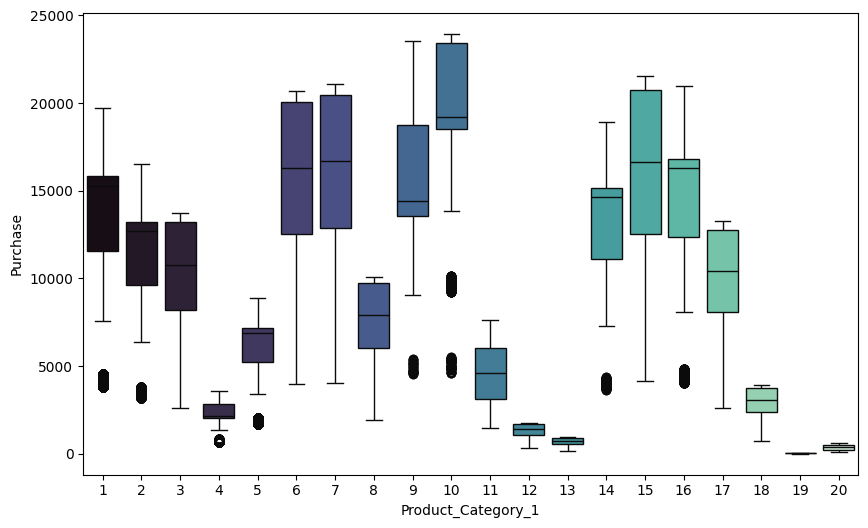

In [85]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Product_Category_1', y='Purchase', palette='mako')
plt.show()

There are some outliers in this graph as well. \
For now, let’s examine how the model performs without removing these outliers

## Data preprocessing

In [86]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In the 'Product_ID' column, the pattern 'P00' repeats throughout, so it can be removed and standardized.

In [87]:
df['Product_ID'] = df['Product_ID'].str.replace('P00','')
ss = StandardScaler()
df['Product_ID'] = ss.fit_transform(df['Product_ID'].values.reshape(-1,1))
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,-1.028774,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,0.722139,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,-0.845799,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,-0.869157,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,1.077382,M,55+,16,C,4+,0,8,NaN,NaN,7969


There are more than 50% missing values in the 'Product_Category_3' column, so we will drop it \
The missing data in the 'Product_Category_2' column will be filled with the mean of the column.


In [88]:
df.drop('Product_Category_3', axis=1, inplace=True)

In [89]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mean())

In [90]:
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,0


As we can see, the missing values have been successfully imputed, and there are no null values remaining in the dataset.

In [91]:
df


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,-1.028774,F,0-17,10,A,2,0,3,9.842329,8370
1,1000001,0.722139,F,0-17,10,A,2,0,1,6.000000,15200
2,1000001,-0.845799,F,0-17,10,A,2,0,12,9.842329,1422
3,1000001,-0.869157,F,0-17,10,A,2,0,12,14.000000,1057
4,1000002,1.077382,M,55+,16,C,4+,0,8,9.842329,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,1.924156,M,51-55,13,B,1,1,20,9.842329,368
550064,1006035,1.953267,F,26-35,1,C,3,0,20,9.842329,371
550065,1006036,1.953267,F,26-35,15,B,4+,1,20,9.842329,137
550066,1006038,1.953267,F,55+,1,C,2,0,20,9.842329,365


Label Encoding is a technique used to convert categorical variables into numeric values

In [92]:
cat_cols = ['Gender','City_Category','Age']
le=LabelEncoder()
for i in cat_cols:
    df[i]=le.fit_transform(df[i])
df.dtypes

,0
User_ID,int64
Product_ID,float64
Gender,int64
Age,int64
Occupation,int64
City_Category,int64
Stay_In_Current_City_Years,object
Marital_Status,int64
Product_Category_1,int64
Product_Category_2,float64


The label encoding technique will now replace all the categorical variables to numeric for easier computation

Remove the '+' symbols in the 'Stay_In_Current_City_Years' column, changing values like '4+' to '4'

In [93]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace('4+','4')

In [94]:
df['Gender'] = df['Gender'].astype(int)
df['Age'] = df['Age'].astype(int)
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

In [95]:
df['City_Category'] = df['City_Category'].astype('category')

In [96]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,-1.028774,0,0,10,0,2,0,3,9.842329,8370
1,1000001,0.722139,0,0,10,0,2,0,1,6.000000,15200
2,1000001,-0.845799,0,0,10,0,2,0,12,9.842329,1422
3,1000001,-0.869157,0,0,10,0,2,0,12,14.000000,1057
4,1000002,1.077382,1,6,16,2,4,0,8,9.842329,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,1.924156,1,5,13,1,1,1,20,9.842329,368
550064,1006035,1.953267,0,2,1,2,3,0,20,9.842329,371
550065,1006036,1.953267,0,2,15,1,4,1,20,9.842329,137
550066,1006038,1.953267,0,6,1,2,2,0,20,9.842329,365


### Distribution plot
The distribution plot shows us how the overall data is distributed in the dataframe


In probability theory and statistics, skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The Skewness value can be positive, zero, negative, or undefined.

For a unimodal distribution, negative skew commonly indicates that the tail is on the left side of the distribution, and positive skew indicates that the tail is on the right. In cases where one tail is long but the other tail is fat, skewness does not obey a simple rule. For example, a zero value means that the tails on both sides of the mean balance out overall; this is the case for a symmetric distribution, but can also be true for an asymmetric distribution where one tail is long and thin, and the other is short but fat.

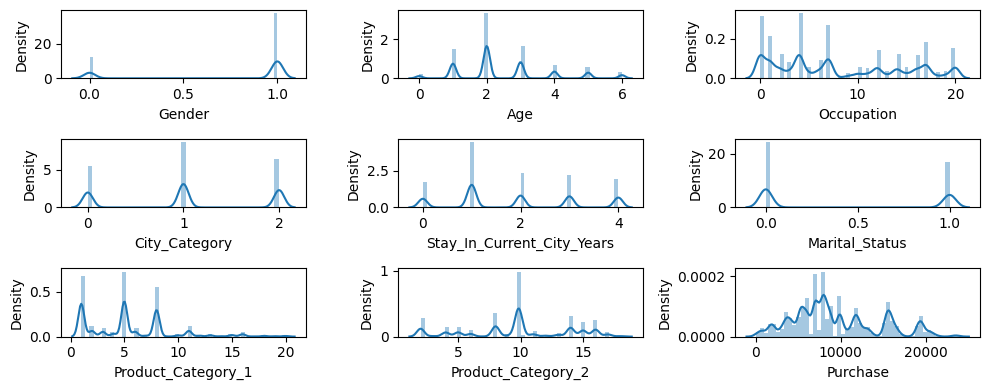

In [97]:
rows = 3
cols = 3
fig, ax = plt.subplots(nrows=rows,ncols=cols, figsize=(10,4))
col = df.columns
index = 2
for i in range(rows):
  for j in range(cols):
    sns.distplot(df[col[index]], ax=ax[i][j])
    index = index+1

plt.tight_layout()

Many of the distributions appear to be skewed, especially the "Purchase" distribution, which shows a long tail to the right (positive skew)

We can apply log transformation to positively skewed distributions. This transformation can help normalize the data, making it more suitable for certain types of statistical analyses or machine learning models

### Log transformation

The log transformation is arguably the most popular among the different types of transformations used to transform skewed data to approximately conform to normality. If the original data follows a log-normal distribution, or approximately so, then the log-transformed data follows a normal or near-normal distribution

In [98]:
df['Purchase']=np.log(df['Purchase'])


Use the get_dummies() function to convert categorical variables into dummy/indicator variables.

In [99]:
df=pd.get_dummies(df)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,City_Category_0,City_Category_1,City_Category_2
0,1000001,-1.028774,0,0,10,2,0,3,9.842329,9.032409,True,False,False
1,1000001,0.722139,0,0,10,2,0,1,6.000000,9.629051,True,False,False
2,1000001,-0.845799,0,0,10,2,0,12,9.842329,7.259820,True,False,False
3,1000001,-0.869157,0,0,10,2,0,12,14.000000,6.963190,True,False,False
4,1000002,1.077382,1,6,16,4,0,8,9.842329,8.983314,False,False,True


## Train - Test split

Split the data into X and Y, where the independent and dependent variables are separated.

In [100]:
X = df.drop(labels = ['Purchase'], axis = 1)
Y = df['Purchase']
X.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,City_Category_0,City_Category_1,City_Category_2
0,1000001,-1.028774,0,0,10,2,0,3,9.842329,True,False,False
1,1000001,0.722139,0,0,10,2,0,1,6.000000,True,False,False
2,1000001,-0.845799,0,0,10,2,0,12,9.842329,True,False,False
3,1000001,-0.869157,0,0,10,2,0,12,14.000000,True,False,False
4,1000002,1.077382,1,6,16,4,0,8,9.842329,False,False,True


In [101]:
Y

,Purchase
0,9.032409
1,9.629051
2,7.259820
3,6.963190
4,8.983314
...,...
550063,5.908083
550064,5.916202
550065,4.919981
550066,5.899897


In [102]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(440054, 12) (110014, 12) (440054,) (110014,)


## Scaling the data

In [103]:
scaled = StandardScaler()
X_train = scaled.fit_transform(X_train)
X_test = scaled.transform(X_test)

## Machine Learning

### Linear Regression

In [104]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [105]:
Y_predict = model.predict(X_test)

In [106]:
score = r2_score(Y_test, Y_predict)
mae = mean_absolute_error(Y_test, Y_predict)
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)
print('R2 Score: ', score)
print('MAE (mean absolute error): ', mae)
print('MSE (mean squared error): ', mse)
print('RMSE (root mean squared error): ', rmse)

R2 Score:  0.20164312529706552
MAE (mean absolute error):  0.4556555470122346
MSE (mean squared error):  0.4437959072056233
RMSE (root mean squared error):  0.6661800861671139


The evaluation metrics above help us assess how well our model is performing. As we can see, the R² score is only 0.20, and the high RMSE indicates that the model is not very accurate in predicting purchases or the target variable.

### Decision Tree Regressor

In [107]:
DT = DecisionTreeRegressor(max_depth=9)
DT.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=9)

In [108]:
train_preds = DT.predict(X_train)
test_preds = DT.predict(X_test)

In [109]:
RMSE_train = (np.sqrt(metrics.mean_squared_error(Y_train, train_preds)))
RMSE_test = (np.sqrt(metrics.mean_squared_error(Y_test, test_preds)))

In [110]:
print('RMSE Training Data = ', str(RMSE_train))
print('RMSE Test Data = ', str(RMSE_test))
print('-'*50)
print('RSquared value on train: ', DT.score(X_train, Y_train))
print('RSquared value on test: ', DT.score(X_test, Y_test))

RMSE Training Data =  0.3680408214406253
RMSE Test Data =  0.3689679856119737
--------------------------------------------------
RSquared value on train:  0.7519510621944241
RSquared value on test:  0.7550986681111388


The Decision Tree Regressor is better compared to Linear Regression, as it can be observed that the root mean square error is lower, and the R² value is higher in this model.

### Random Forest Regressor

In [111]:
RF = RandomForestRegressor(n_estimators=50, max_depth=10, n_jobs=-1, random_state=42)
RF.fit(X_train, Y_train)

RandomForestRegressor(max_depth=10, n_estimators=50, n_jobs=-1, random_state=42)

In [112]:
train_preds1 = RF.predict(X_train)
test_preds1 = RF.predict(X_test)

In [113]:
RMSE_train = (np.sqrt(metrics.mean_squared_error(Y_train, train_preds1)))
RMSE_test = (np.sqrt(metrics.mean_squared_error(Y_test, test_preds1)))

In [114]:
print('RMSE Training Data = ', str(RMSE_train))
print('RMSE Test Data = ', str(RMSE_test))
print('-'*50)
print('RSquared value on train: ', RF.score(X_train, Y_train))
print('RSquared value on test: ', RF.score(X_test, Y_test))

RMSE Training Data =  0.36149358492514083
RMSE Test Data =  0.3629910459360397
--------------------------------------------------
RSquared value on train:  0.7606978622243865
RSquared value on test:  0.7629687531141757


The Random Forest Regressor model is again better than the previous models, as it has a lower root mean square error and a higher R² value compared to the previous models.

## Loading the data for testing

In [131]:
df_test = pd.read_csv('test.csv')
df_test

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN


In [132]:
df_test.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,72344


In [133]:
df_test['Product_ID'] = df_test['Product_ID'].str.replace('P00', '')
ss = StandardScaler()
df_test['Product_ID'] = ss.fit_transform(df_test['Product_ID'].values.reshape(-1, 1))

In [134]:
df_test.drop('Product_Category_3', axis=1, inplace=True)

In [135]:
df_test['Product_Category_2']=df_test['Product_Category_2'].fillna(df_test['Product_Category_2'].mean())

In [136]:
df_test.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,0


In [137]:
df_test

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
0,1000004,-0.434752,M,46-50,7,B,2,1,1,11.000000
1,1000009,-0.587188,M,26-35,17,C,0,0,3,5.000000
2,1000010,1.133865,F,36-45,1,B,4+,1,5,14.000000
3,1000010,-0.273465,F,36-45,1,B,4+,1,4,9.000000
4,1000011,-1.173330,F,26-35,1,C,1,0,4,5.000000
...,...,...,...,...,...,...,...,...,...,...
233594,1006036,-0.533098,F,26-35,15,B,4+,1,8,9.849586
233595,1006036,0.801456,F,26-35,15,B,4+,1,5,8.000000
233596,1006036,-1.389691,F,26-35,15,B,4+,1,1,5.000000
233597,1006037,-0.476058,F,46-50,1,C,4+,0,10,16.000000


### Label Encoding categorical data

In [138]:
cat_cols=['Gender','City_Category','Age']
le=LabelEncoder()
for i in cat_cols:
    df_test[i]=le.fit_transform(df_test[i])
df_test.dtypes

,0
User_ID,int64
Product_ID,float64
Gender,int64
Age,int64
Occupation,int64
City_Category,int64
Stay_In_Current_City_Years,object
Marital_Status,int64
Product_Category_1,int64
Product_Category_2,float64


In [139]:
df_test['Stay_In_Current_City_Years']=df_test['Stay_In_Current_City_Years'].replace('4+','4')

df_test['Gender']=df_test['Gender'].astype(int)
df_test['Age']=df_test['Age'].astype(int)
df_test['Stay_In_Current_City_Years']=df_test['Stay_In_Current_City_Years'].astype(int)
df_test['City_Category']=df_test['City_Category'].astype('category')

In [140]:
df_test = pd.get_dummies(df_test)

In [141]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,City_Category_0,City_Category_1,City_Category_2
0,1000004,-0.434752,1,4,7,2,1,1,11.0,False,True,False
1,1000009,-0.587188,1,2,17,0,0,3,5.0,False,False,True
2,1000010,1.133865,0,3,1,4,1,5,14.0,False,True,False
3,1000010,-0.273465,0,3,1,4,1,4,9.0,False,True,False
4,1000011,-1.173330,0,2,1,1,0,4,5.0,False,False,True


In [142]:
# Shape the train data
df.shape

(550068, 13)

In [143]:
# Shape the test data
df_test.shape

(233599, 12)

In [144]:
df

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,City_Category_0,City_Category_1,City_Category_2
0,1000001,-1.028774,0,0,10,2,0,3,9.842329,9.032409,True,False,False
1,1000001,0.722139,0,0,10,2,0,1,6.000000,9.629051,True,False,False
2,1000001,-0.845799,0,0,10,2,0,12,9.842329,7.259820,True,False,False
3,1000001,-0.869157,0,0,10,2,0,12,14.000000,6.963190,True,False,False
4,1000002,1.077382,1,6,16,4,0,8,9.842329,8.983314,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,1.924156,1,5,13,1,1,20,9.842329,5.908083,False,True,False
550064,1006035,1.953267,0,2,1,3,0,20,9.842329,5.916202,False,False,True
550065,1006036,1.953267,0,2,15,4,1,20,9.842329,4.919981,False,True,False
550066,1006038,1.953267,0,6,1,2,0,20,9.842329,5.899897,False,False,True


In [145]:
df_test

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,City_Category_0,City_Category_1,City_Category_2
0,1000004,-0.434752,1,4,7,2,1,1,11.000000,False,True,False
1,1000009,-0.587188,1,2,17,0,0,3,5.000000,False,False,True
2,1000010,1.133865,0,3,1,4,1,5,14.000000,False,True,False
3,1000010,-0.273465,0,3,1,4,1,4,9.000000,False,True,False
4,1000011,-1.173330,0,2,1,1,0,4,5.000000,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,-0.533098,0,2,15,4,1,8,9.849586,False,True,False
233595,1006036,0.801456,0,2,15,4,1,5,8.000000,False,True,False
233596,1006036,-1.389691,0,2,15,4,1,1,5.000000,False,True,False
233597,1006037,-0.476058,0,4,1,4,0,10,16.000000,False,False,True


## Predict

Since the Random Forest Regressor performed very well compared to both the Linear Regression and Decision Tree Regressor models, it has been used to make predictions on our test dataset.

In [146]:
test_preds = RF.predict(df_test)
len(test_preds)

233599

In [147]:
id_frame = pd.read_csv('test.csv')

In [148]:
ID_info = id_frame[['User_ID','Product_ID']]
ID_info.head()

,User_ID,Product_ID
0,1000004,P00128942
1,1000009,P00113442
2,1000010,P00288442
3,1000010,P00145342
4,1000011,P00053842


### Purchase Prediction

In [149]:
predictions= pd.DataFrame(test_preds, columns=["Purchase"])
predictions["User_ID"]= ID_info["User_ID"]
predictions["Product_ID"]= ID_info["Product_ID"]
predictions.head()

,Purchase,User_ID,Product_ID
0,9.763260,1000004,P00128942
1,9.516985,1000009,P00113442
2,4.735476,1000010,P00288442
3,4.735476,1000010,P00145342
4,4.577567,1000011,P00053842
